In [1]:
#Get all packages needed
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")

I will use cleaned Customer Demographic csv file created during Task 1.

In [2]:
df=pd.read_csv('cleaned_NewCustomerList.csv')
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


Let's find age of each customer from DOB and create column from them. Then make age groups for future use.

In [3]:
from datetime import datetime
from datetime import date

In [4]:
df["DOB"] = pd.to_datetime(df["DOB"])

df["age"] = df["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))
df["age"].head()

0    64
1    51
2    47
3    42
4    56
Name: age, dtype: int64

In [5]:
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,64
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,51
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,47
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,42
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,56


In [6]:
df.sort_values("age", ascending=False)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
769,Andrea,Pendle,Female,86,1938-08-05,Librarian,Entertainment,High Net Worth,N,Yes,13,31281 Meadow Valley Way,4500,QLD,Australia,6,760,0.637500,83
885,Zachariah,Meininking,Male,40,1938-06-09,Cost Accountant,Financial Services,Affluent Customer,N,Yes,20,24815 Lindbergh Avenue,2749,NSW,Australia,7,883,0.531250,83
265,Alleen,Eaken,Female,56,1938-08-31,Desktop Support Technician,Property,Mass Customer,N,No,10,343 Lakewood Center,2089,NSW,Australia,12,259,1.062500,83
406,Kippar,Brimilcome,Male,21,1938-11-29,Graphic Designer,Health,Mass Customer,N,No,19,082 Welch Lane,2089,NSW,Australia,11,405,0.930000,83
585,Letizia,Poore,Female,27,1938-08-30,Web Developer II,Manufacturing,Affluent Customer,N,No,15,95796 Mcbride Drive,3677,VIC,Australia,3,583,0.787500,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,Aundrea,Outridge,Female,77,2001-01-24,Structural Engineer,Financial Services,Affluent Customer,N,Yes,10,1530 Columbus Lane,3186,VIC,Australia,12,974,0.425000,20
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000,20
354,Giulietta,Garbott,Female,59,2002-02-27,Technical Writer,Health,Affluent Customer,N,Yes,14,48297 Stuart Circle,3810,VIC,Australia,5,355,0.984375,19
396,Lura,Fawdrie,Female,66,2002-01-17,VP Sales,Health,Mass Customer,N,Yes,4,67183 Anniversary Parkway,4211,QLD,Australia,3,396,0.937500,19


While cleaning data set I forgot to fix it. Age 178 is not realistic, and need to fix. Lets drop this row.

In [7]:
df['age'].max()

83

In [8]:
df['age'].min()

19

In [9]:
bins= [0,15,25,65,90]
labels = ['Teen','Youth','Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,AgeGroup
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,64,Adult
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,51,Adult
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,47,Adult
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,42,Adult
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,56,Adult


In [10]:
df['AgeGroup'].value_counts()

Adult     683
Senior    239
Youth      78
Teen        0
Name: AgeGroup, dtype: int64

Text(0, 0.5, 'Number of Customers')

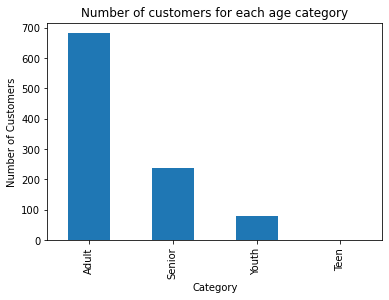

In [11]:
df['AgeGroup'].value_counts().plot(kind="bar")
plt.title("Number of customers for each age category")
plt.xlabel("Category")
plt.ylabel("Number of Customers")

In [12]:
df['job_title'].value_counts().head(10)

Associate Professor               18
Environmental Tech                17
Chief Design Engineer             16
Payment Adjustment Coordinator    15
Design Engineer                   15
Account Executive                 14
Social Worker                     14
Software Consultant               14
Assistant Media Planner           13
Environmental Specialist          13
Name: job_title, dtype: int64

In [13]:
df['job_industry_category'].value_counts()

Manufacturing         246
Financial Services    230
Health                185
Retail                 86
Property               80
IT                     63
Entertainment          49
Telecommunications     31
Argiculture            30
Name: job_industry_category, dtype: int64

Text(0, 0.5, 'Number of Customers')

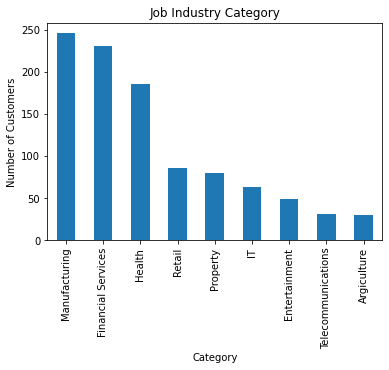

In [14]:
df['job_industry_category'].value_counts().plot(kind="bar")
plt.title("Job Industry Category")
plt.xlabel("Category")
plt.ylabel("Number of Customers")


In [15]:
df['owns_car'].value_counts()

No     507
Yes    493
Name: owns_car, dtype: int64

Text(0, 0.5, 'Number of Customers')

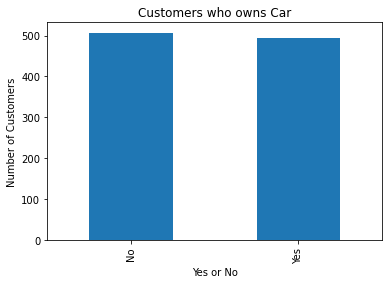

In [16]:
df['owns_car'].value_counts().plot(kind="bar")
plt.title("Customers who owns Car")
plt.xlabel("Yes or No")
plt.ylabel("Number of Customers")

In [17]:
df['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

Text(0, 0.5, 'Number of Customers')

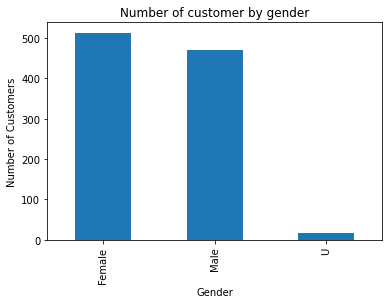

In [18]:
df['gender'].value_counts().plot(kind="bar")
plt.title("Number of customer by gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")

Text(0, 0.5, 'Sum')

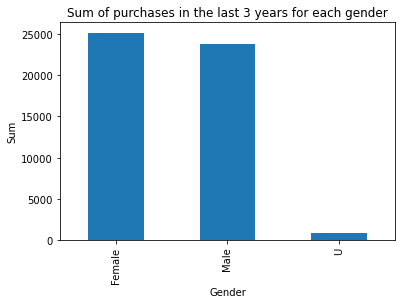

In [19]:
df.groupby(by=["gender"])["past_3_years_bike_related_purchases"].sum().plot(kind="bar")
plt.title("Sum of purchases in the last 3 years for each gender")
plt.xlabel("Gender")
plt.ylabel("Sum")

In [20]:
df['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

Text(0, 0.5, 'Number of Customers')

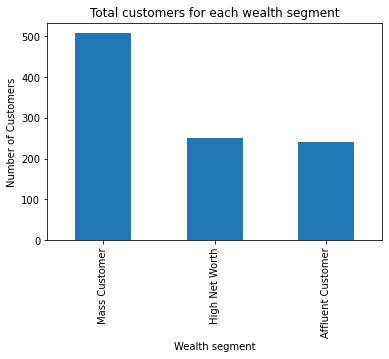

In [21]:
df['wealth_segment'].value_counts().plot(kind="bar")
plt.title("Total customers for each wealth segment")
plt.xlabel("Wealth segment")
plt.ylabel("Number of Customers")

In [22]:
df['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

Text(0, 0.5, 'Number of Customers')

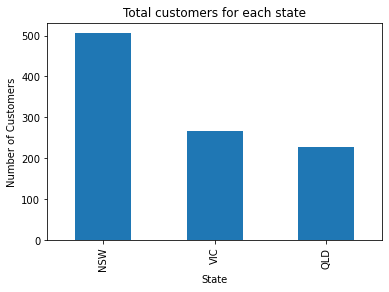

In [23]:
df['state'].value_counts().plot(kind="bar")
plt.title("Total customers for each state")
plt.xlabel("State")
plt.ylabel("Number of Customers")

Text(0, 0.5, 'Number of Customers')

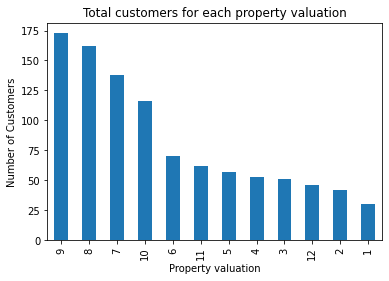

In [24]:
df['property_valuation'].value_counts().plot(kind="bar")
plt.title("Total customers for each property valuation")
plt.xlabel("Property valuation")
plt.ylabel("Number of Customers")